In [7]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout,Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.layers.normalization import BatchNormalization


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
#load the data

training_set = pd.read_csv('fashion-mnist_train.csv')
testing_set = pd.read_csv('fashion-mnist_test.csv')



In [4]:
#Preprocess the data 
# Reshape the given csv into the original images


# pixels values for each image
X_train = np.array(training_set.iloc[:,1:])
X_test = np.array(testing_set.iloc[:,1:])

X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')


X_train = X_train/255
X_test = X_test/255

#label for each image
target = training_set.iloc[:,0]
y_train = to_categorical(np.array(training_set.iloc[:,0])) 
y_test = to_categorical(np.array(testing_set.iloc[:,0]))

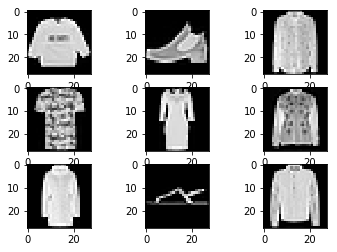

In [9]:
# Check if the reshaping worked by displaying the 9 first images 

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(np.squeeze(X_train[i]), cmap='gray')
plt.show()

In [5]:
# Building a cnn model
shape = (28,28,1)
number_of_classes = y_test.shape[1]
def create_model():
    model = Sequential()
    model.add(Conv2D(32,(5,5),activation ='relu',input_shape = shape ))
    model.add(Conv2D(32,(5,5),activation ='relu',input_shape = shape ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(5,5),activation ='relu' ))
    model.add(Conv2D(64,(5,5),activation ='relu' ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [8]:
# Training the model
batch_size = 150
epochs = 10
model = create_model()
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 397s 7ms/step - loss: 0.5129 - acc: 0.8116 - val_loss: 0.8822 - val_acc: 0.7193
Epoch 2/10
60000/60000 [==============================] - 447s 7ms/step - loss: 0.3354 - acc: 0.8779 - val_loss: 0.3037 - val_acc: 0.8899
Epoch 3/10
60000/60000 [==============================] - 454s 8ms/step - loss: 0.2892 - acc: 0.8947 - val_loss: 0.2932 - val_acc: 0.8938
Epoch 4/10
60000/60000 [==============================] - 432s 7ms/step - loss: 0.2658 - acc: 0.9031 - val_loss: 0.3589 - val_acc: 0.8643
Epoch 5/10
60000/60000 [==============================] - 410s 7ms/step - loss: 0.2429 - acc: 0.9111 - val_loss: 0.2426 - val_acc: 0.9090
Epoch 6/10
60000/60000 [==============================] - 430s 7ms/step - loss: 0.2258 - acc: 0.9165 - val_loss: 0.2306 - val_acc: 0.9162
Epoch 7/10
60000/60000 [==============================] - 406s 7ms/step - loss: 0.2154 - acc: 0.9204 - val_loss: 0.2896 - 

In [7]:
# Evaluate the model 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.278818559885
Test accuracy: 0.8911


In [9]:
# Make predictions about the classes
predictions = model.predict_classes(X_test,batch_size=150)  


In [10]:
# Save the classification

filename = 'cnn_classification4.csv';
PictureID = list(range(1,len(predictions)+1))
submission = pd.DataFrame({'Clothe_category':predictions })
submission.to_csv(filename,header = True, index = False)
print('Saved file: ' + filename)

Saved file: cnn_classification4.csv


In [11]:
# Data Model visualization
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 64)          51264     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 64)          102464    
__________

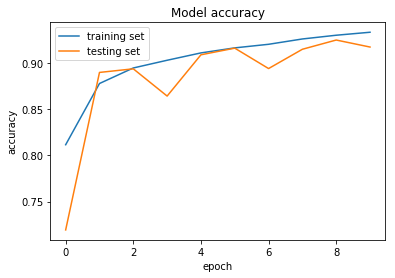

In [13]:
# Accuracy visualization
training_accuracy = history.history['acc']
testing_accuracy = history.history['val_acc']
plt.plot(training_accuracy)
plt.plot(testing_accuracy)
plt.title('Model accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [14]:
# Loss visualization

training_loss = history.history['loss']
testing_loss = history.history['val_loss']
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title('Model loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()


NameError: name 'history2' is not defined